In [1]:
import pandas as pd
import numpy as np

# 작업형 1유형

In [4]:
data = pd.read_csv('./data/mtcars.csv')

In [5]:
data.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [6]:
data['qsec']

0     16.46
1     17.02
2     18.61
3     19.44
4     17.02
5     20.22
6     15.84
7     20.00
8     22.90
9     18.30
10    18.90
11    17.40
12    17.60
13    18.00
14    17.98
15    17.82
16    17.42
17    19.47
18    18.52
19    19.90
20    20.01
21    16.87
22    17.30
23    15.41
24    17.05
25    18.90
26    16.70
27    16.90
28    14.50
29    15.50
30    14.60
31    18.60
Name: qsec, dtype: float64

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
scale = MinMaxScaler()

In [13]:
data[['qsec_sc']] = scale.fit_transform(data[['qsec']])

In [14]:
data.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,qsec_sc
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,0.233333
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,0.300000
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,0.489286
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,0.588095
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,0.300000


In [18]:
len(data[data['qsec_sc']>0.5])

9

# 작업형 2유형

## 기본 전처리

In [26]:
X_train = pd.read_csv('./data/X_train.csv', encoding = 'CP949')

In [54]:
X_train

,cust_id,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기,총구매액_최종
0,0,68282840,11264000,6860000.0,기타,강남점,19,3.894737,0.527027,17,61422840.0
1,1,2136000,2136000,300000.0,스포츠,잠실점,2,1.500000,0.000000,1,1836000.0
2,2,3197000,1639000,0.0,남성 캐주얼,관악점,2,2.000000,0.000000,1,3197000.0
3,3,16077620,4935000,0.0,기타,광주점,18,2.444444,0.318182,16,16077620.0
4,4,29050000,24000000,0.0,보석,본 점,2,1.500000,0.000000,85,29050000.0
...,...,...,...,...,...,...,...,...,...,...,...
3495,3495,3175200,3042900,0.0,골프,본 점,1,2.000000,1.000000,0,3175200.0
3496,3496,29628600,7200000,6049600.0,시티웨어,부산본점,8,1.625000,0.461538,40,23579000.0
3497,3497,75000,75000,0.0,주방용품,창원점,1,1.000000,0.000000,0,75000.0
3498,3498,1875000,1000000,0.0,화장품,본 점,2,1.000000,0.000000,39,1875000.0


In [53]:
Y_train = pd.read_csv('./data/y_train.csv',encoding = 'CP949')
Y_train

,cust_id,gender
0,0,0
1,1,0
2,2,1
3,3,1
4,4,0
...,...,...
3495,3495,1
3496,3496,1
3497,3497,0
3498,3498,0


In [60]:
help(pd.concat)

Help on function concat in module pandas.core.reshape.concat:

concat(objs: Union[Iterable[~FrameOrSeries], Mapping[Union[Hashable, NoneType], ~FrameOrSeries]], axis=0, join='outer', ignore_index: bool = False, keys=None, levels=None, names=None, verify_integrity: bool = False, sort: bool = False, copy: bool = True) -> Union[ForwardRef('DataFrame'), ForwardRef('Series')]
    Concatenate pandas objects along a particular axis with optional set logic
    along the other axes.
    
    Can also add a layer of hierarchical indexing on the concatenation axis,
    which may be useful if the labels are the same (or overlapping) on
    the passed axis number.
    
    Parameters
    ----------
    objs : a sequence or mapping of Series or DataFrame objects
        If a mapping is passed, the sorted keys will be used as the `keys`
        argument, unless it is passed, in which case the values will be
        selected (see below). Any None objects will be dropped silently unless
        they ar

In [64]:
help(pd.merge)

Help on function merge in module pandas.core.reshape.merge:

merge(left, right, how: str = 'inner', on=None, left_on=None, right_on=None, left_index: bool = False, right_index: bool = False, sort: bool = False, suffixes=('_x', '_y'), copy: bool = True, indicator: bool = False, validate=None) -> 'DataFrame'
    Merge DataFrame or named Series objects with a database-style join.
    
    The join is done on columns or indexes. If joining columns on
    columns, the DataFrame indexes *will be ignored*. Otherwise if joining indexes
    on indexes or indexes on a column or columns, the index will be passed on.
    
    Parameters
    ----------
    left : DataFrame
    right : DataFrame or named Series
        Object to merge with.
    how : {'left', 'right', 'outer', 'inner'}, default 'inner'
        Type of merge to be performed.
    
        * left: use only keys from left frame, similar to a SQL left outer join;
          preserve key order.
        * right: use only keys from right fra

In [70]:
final_data = pd.merge(X_train, Y_train, on='cust_id')

In [71]:
# 결측치 확인
final_data.isnull().sum()

cust_id    0
총구매액       0
최대구매액      0
환불금액       0
주구매상품      0
주구매지점      0
내점일수       0
내점당구매건수    0
주말방문비율     0
구매주기       0
총구매액_최종    0
gender     0
dtype: int64

In [31]:
X_train['환불금액'] = X_train['환불금액'].fillna(0)

In [33]:
X_train.isnull().sum()

cust_id    0
총구매액       0
최대구매액      0
환불금액       0
주구매상품      0
주구매지점      0
내점일수       0
내점당구매건수    0
주말방문비율     0
구매주기       0
dtype: int64

In [35]:
# 변수 생성
X_train['총구매액_최종'] = X_train['총구매액'] - X_train['환불금액']

In [38]:
X_train

,cust_id,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기,총구매액_최종
0,0,68282840,11264000,6860000.0,기타,강남점,19,3.894737,0.527027,17,61422840.0
1,1,2136000,2136000,300000.0,스포츠,잠실점,2,1.500000,0.000000,1,1836000.0
2,2,3197000,1639000,0.0,남성 캐주얼,관악점,2,2.000000,0.000000,1,3197000.0
3,3,16077620,4935000,0.0,기타,광주점,18,2.444444,0.318182,16,16077620.0
4,4,29050000,24000000,0.0,보석,본 점,2,1.500000,0.000000,85,29050000.0
...,...,...,...,...,...,...,...,...,...,...,...
3495,3495,3175200,3042900,0.0,골프,본 점,1,2.000000,1.000000,0,3175200.0
3496,3496,29628600,7200000,6049600.0,시티웨어,부산본점,8,1.625000,0.461538,40,23579000.0
3497,3497,75000,75000,0.0,주방용품,창원점,1,1.000000,0.000000,0,75000.0
3498,3498,1875000,1000000,0.0,화장품,본 점,2,1.000000,0.000000,39,1875000.0


In [72]:
final_data

,cust_id,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기,총구매액_최종,gender
0,0,68282840,11264000,6860000.0,기타,강남점,19,3.894737,0.527027,17,61422840.0,0
1,1,2136000,2136000,300000.0,스포츠,잠실점,2,1.500000,0.000000,1,1836000.0,0
2,2,3197000,1639000,0.0,남성 캐주얼,관악점,2,2.000000,0.000000,1,3197000.0,1
3,3,16077620,4935000,0.0,기타,광주점,18,2.444444,0.318182,16,16077620.0,1
4,4,29050000,24000000,0.0,보석,본 점,2,1.500000,0.000000,85,29050000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3495,3495,3175200,3042900,0.0,골프,본 점,1,2.000000,1.000000,0,3175200.0,1
3496,3496,29628600,7200000,6049600.0,시티웨어,부산본점,8,1.625000,0.461538,40,23579000.0,1
3497,3497,75000,75000,0.0,주방용품,창원점,1,1.000000,0.000000,0,75000.0,0
3498,3498,1875000,1000000,0.0,화장품,본 점,2,1.000000,0.000000,39,1875000.0,0


In [73]:
# 이상치 제거
final_data_dropprice = final_data[final_data['총구매액_최종']>=0]

In [76]:
temp = final_data_dropprice.copy()

In [79]:
temp

,cust_id,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기,총구매액_최종,gender
0,0,68282840,11264000,6860000.0,기타,강남점,19,3.894737,0.527027,17,61422840.0,0
1,1,2136000,2136000,300000.0,스포츠,잠실점,2,1.500000,0.000000,1,1836000.0,0
2,2,3197000,1639000,0.0,남성 캐주얼,관악점,2,2.000000,0.000000,1,3197000.0,1
3,3,16077620,4935000,0.0,기타,광주점,18,2.444444,0.318182,16,16077620.0,1
4,4,29050000,24000000,0.0,보석,본 점,2,1.500000,0.000000,85,29050000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3495,3495,3175200,3042900,0.0,골프,본 점,1,2.000000,1.000000,0,3175200.0,1
3496,3496,29628600,7200000,6049600.0,시티웨어,부산본점,8,1.625000,0.461538,40,23579000.0,1
3497,3497,75000,75000,0.0,주방용품,창원점,1,1.000000,0.000000,0,75000.0,0
3498,3498,1875000,1000000,0.0,화장품,본 점,2,1.000000,0.000000,39,1875000.0,0


In [89]:
# 로그변환
temp[['총구매액_최종_log']]=np.log(temp[['총구매액_최종']]+1)

In [90]:
temp

,cust_id,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기,총구매액_최종,gender,총구매액_최종_log
0,0,68282840,11264000,6860000.0,기타,강남점,19,3.894737,0.527027,17,61422840.0,0,17.933292
1,1,2136000,2136000,300000.0,스포츠,잠실점,2,1.500000,0.000000,1,1836000.0,0,14.423100
2,2,3197000,1639000,0.0,남성 캐주얼,관악점,2,2.000000,0.000000,1,3197000.0,1,14.977724
3,3,16077620,4935000,0.0,기타,광주점,18,2.444444,0.318182,16,16077620.0,1,16.592939
4,4,29050000,24000000,0.0,보석,본 점,2,1.500000,0.000000,85,29050000.0,0,17.184529
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,3495,3175200,3042900,0.0,골프,본 점,1,2.000000,1.000000,0,3175200.0,1,14.970881
3496,3496,29628600,7200000,6049600.0,시티웨어,부산본점,8,1.625000,0.461538,40,23579000.0,1,16.975867
3497,3497,75000,75000,0.0,주방용품,창원점,1,1.000000,0.000000,0,75000.0,0,11.225257
3498,3498,1875000,1000000,0.0,화장품,본 점,2,1.000000,0.000000,39,1875000.0,0,14.444120


In [118]:
temp[['주구매상품']].value_counts()

주구매상품 
기타        588
가공식품      537
농산물       336
화장품       261
시티웨어      206
디자이너      184
수산품       150
명품         98
캐주얼        97
섬유잡화       95
골프         81
스포츠        66
일용잡화       64
육류         57
남성 캐주얼     55
구두         52
모피/피혁      51
건강식품       47
차/커피       42
피혁잡화       39
아동         38
축산가공       34
주방용품       32
셔츠         30
젓갈/반찬      29
주방가전       25
남성정장       22
트래디셔널      21
주류         14
생활잡화       13
가구         10
커리어         8
란제리/내의      8
대형가전        7
식기          7
액세서리        4
침구/수예       4
통신/컴퓨터      3
보석          3
남성 트랜디      2
악기          2
소형가전        2
dtype: int64

In [443]:
outlier = data_dropprice.copy()

In [450]:
help(np.quantile)

Help on function quantile in module numpy:

quantile(a, q, axis=None, out=None, overwrite_input=False, interpolation='linear', keepdims=False)
    Compute the q-th quantile of the data along the specified axis.
    
    .. versionadded:: 1.15.0
    
    Parameters
    ----------
    a : array_like
        Input array or object that can be converted to an array.
    q : array_like of float
        Quantile or sequence of quantiles to compute, which must be between
        0 and 1 inclusive.
    axis : {int, tuple of int, None}, optional
        Axis or axes along which the quantiles are computed. The
        default is to compute the quantile(s) along a flattened
        version of the array.
    out : ndarray, optional
        Alternative output array in which to place the result. It must
        have the same shape and buffer length as the expected output,
        but the type (of the output) will be cast if necessary.
    overwrite_input : bool, optional
        If True, then allow t

In [466]:
def outlierdelete(x) : 
    Q1 = np.quantile(x,0.25)
    Q3 = np.quantile(x,0.75)
    IQR = Q3 - Q1
    min = Q1-1.5*IQR
    if min<0 :
        min = 0
    max = Q3+1.5*IQR
    return min, max

In [490]:
temp.iloc[:,:13]

,cust_id,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기,gender,총구매액_최종_log,총구매액_log,최대구매액_log,환불금액_log,총구매건수
0,0,기타,강남점,19,3.894737,0.527027,17,0,17.933292,18.039169,16.237122,15.741218,74.0
1,1,스포츠,잠실점,2,1.500000,0.000000,1,0,14.423100,14.574446,14.574446,12.611541,3.0
2,2,남성 캐주얼,관악점,2,2.000000,0.000000,1,1,14.977724,14.977724,14.309597,0.000000,4.0
3,3,기타,광주점,18,2.444444,0.318182,16,1,16.592939,16.592939,15.411863,0.000000,44.0
5,5,디자이너,일산점,3,1.666667,0.200000,42,0,16.205832,16.247280,16.072261,13.043322,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,3495,골프,본 점,1,2.000000,1.000000,0,1,14.970881,14.970881,14.928322,0.000000,2.0
3496,3496,시티웨어,부산본점,8,1.625000,0.461538,40,1,16.975867,17.204251,15.789592,15.615503,13.0
3497,3497,주방용품,창원점,1,1.000000,0.000000,0,0,11.225257,11.225257,11.225257,0.000000,1.0
3498,3498,화장품,본 점,2,1.000000,0.000000,39,0,14.444120,14.444120,13.815512,0.000000,2.0


In [476]:
outlierdelete(outlier[['내점일수']])

(0, 59.5)

In [472]:
outlier.describe()

,cust_id,총구매액,최대구매액,환불금액,내점일수,내점당구매건수,주말방문비율,구매주기,총구매액_최종
count,3424.000000,3.424000e+03,3.424000e+03,3.424000e+03,3424.000000,3424.000000,3424.000000,3424.000000,3.424000e+03
mean,1749.336741,9.345737e+07,1.952132e+07,7.348457e+06,19.388143,2.843731,0.306121,21.061916,8.610892e+07
std,1011.157138,1.648270e+08,3.177930e+07,2.576906e+07,27.309830,1.921588,0.290263,24.832791,1.519821e+08
min,0.000000,5.000000e+03,5.000000e+03,0.000000e+00,1.000000,1.000000,0.000000,0.000000,0.000000e+00
25%,875.750000,5.045732e+06,2.857800e+06,0.000000e+00,2.000000,1.686678,0.018758,4.000000,4.769000e+06
50%,1749.500000,2.890710e+07,9.881000e+06,0.000000e+00,9.000000,2.333333,0.253984,13.000000,2.718614e+07
75%,2624.250000,1.086163e+08,2.283750e+07,2.120100e+06,25.000000,3.375845,0.447011,28.250000,1.009855e+08
max,3499.000000,2.323180e+09,7.066290e+08,3.815210e+08,285.000000,22.083333,1.000000,166.000000,2.023724e+09


{'whiskers': [<matplotlib.lines.Line2D at 0x1c1bf40f2e0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c1bf07c1f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c1ba360280>],
 'medians': [<matplotlib.lines.Line2D at 0x1c1bf07cac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c1ba4a1d30>],
 'means': []}

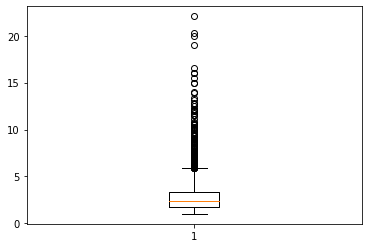

In [475]:
plt.boxplot(outlier[['내점당구매건수']])

## 모델링

In [96]:
from sklearn.linear_model import LogisticRegression

In [98]:
from sklearn.model_selection import train_test_split

In [175]:
X_train, X_test, Y_train, Y_test = train_test_split(temp[['총구매액_최종_log']], temp[['gender']], train_size =0.7, random_state=0, stratify=temp[['gender']])

In [431]:
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score

In [106]:
# 로지스틱 회귀를 이용하여 학습 및 예측 수행. 
lr_clf = LogisticRegression()
lr_clf.fit(X_train, Y_train)
lr_preds = lr_clf.predict(X_test)

# accuracy와 roc_auc 측정
print('accuracy: {:0.3f}'.format(accuracy_score(Y_test, lr_preds)))
print('roc_auc: {:0.3f}'.format(roc_auc_score(Y_test , lr_preds)))

accuracy: 0.632
roc_auc: 0.543


C:\Users\choi yeseul\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [128]:
temp[['총구매액','최대구매액','환불금액']]

,총구매액,최대구매액,환불금액
0,68282840,11264000,6860000.0
1,2136000,2136000,300000.0
2,3197000,1639000,0.0
3,16077620,4935000,0.0
4,29050000,24000000,0.0
...,...,...,...
3495,3175200,3042900,0.0
3496,29628600,7200000,6049600.0
3497,75000,75000,0.0
3498,1875000,1000000,0.0


In [131]:
temp[['총구매액_log','최대구매액_log','환불금액_log']] = np.log(temp[['총구매액','최대구매액','환불금액']]+1)

In [144]:
temp = temp.drop(temp[['총구매액','최대구매액','환불금액','총구매액_최종']],axis=1)

In [145]:
temp['총구매건수'] = temp['내점일수']*temp['내점당구매건수']

In [346]:
a = temp['주구매상품'].value_counts()

In [352]:
list(temp['주구매상품'].value_counts().index)

['기타',
 '가공식품',
 '농산물',
 '화장품',
 '시티웨어',
 '디자이너',
 '수산품',
 '명품',
 '캐주얼',
 '섬유잡화',
 '골프',
 '스포츠',
 '일용잡화',
 '육류',
 '남성 캐주얼',
 '구두',
 '모피/피혁',
 '건강식품',
 '차/커피',
 '피혁잡화',
 '아동',
 '축산가공',
 '주방용품',
 '셔츠',
 '젓갈/반찬',
 '주방가전',
 '남성정장',
 '트래디셔널',
 '주류',
 '생활잡화',
 '가구']

In [291]:
dir(pd)

['BooleanDtype',
 'Categorical',
 'CategoricalDtype',
 'CategoricalIndex',
 'DataFrame',
 'DateOffset',
 'DatetimeIndex',
 'DatetimeTZDtype',
 'ExcelFile',
 'ExcelWriter',
 'Float64Index',
 'Grouper',
 'HDFStore',
 'Index',
 'IndexSlice',
 'Int16Dtype',
 'Int32Dtype',
 'Int64Dtype',
 'Int64Index',
 'Int8Dtype',
 'Interval',
 'IntervalDtype',
 'IntervalIndex',
 'MultiIndex',
 'NA',
 'NaT',
 'NamedAgg',
 'Period',
 'PeriodDtype',
 'PeriodIndex',
 'RangeIndex',
 'Series',
 'SparseDtype',
 'StringDtype',
 'Timedelta',
 'TimedeltaIndex',
 'Timestamp',
 'UInt16Dtype',
 'UInt32Dtype',
 'UInt64Dtype',
 'UInt64Index',
 'UInt8Dtype',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__docformat__',
 '__file__',
 '__getattr__',
 '__git_version__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_config',
 '_hashtable',
 '_is_numpy_dev',
 '_lib',
 '_libs',
 '_np_version_under1p16',
 '_np_version_under1p17',
 '_np_version_under1p18',
 '_testing',
 '_tslib',
 '_ty

In [347]:
a[a<10]

Series([], Name: 주구매상품, dtype: int64)

In [304]:
ind = temp[(temp['주구매상품']=='커리어')|(temp['주구매상품']=='란제리/내의')|(temp['주구매상품']=='대형가전')|(temp['주구매상품']=='식기')|
     (temp['주구매상품']=='액세서리')|(temp['주구매상품']=='침구/수예')|(temp['주구매상품']=='통신/컴퓨터')|
     (temp['주구매상품']=='보석')|(temp['주구매상품']=='남성 트랜디')|(temp['주구매상품']=='악기')|(temp['주구매상품']=='소형가전')].index
     

In [307]:
len(ind)

50

In [308]:
len(temp)-len(ind)

3374

In [310]:
temp = temp.drop(ind)

In [318]:
product=pd.get_dummies(temp[['주구매상품']])

In [325]:
product

,주구매상품_가공식품,주구매상품_가구,주구매상품_건강식품,주구매상품_골프,주구매상품_구두,주구매상품_기타,주구매상품_남성 캐주얼,주구매상품_남성정장,주구매상품_농산물,주구매상품_디자이너,...,주구매상품_젓갈/반찬,주구매상품_주류,주구매상품_주방가전,주구매상품_주방용품,주구매상품_차/커피,주구매상품_축산가공,주구매상품_캐주얼,주구매상품_트래디셔널,주구매상품_피혁잡화,주구매상품_화장품
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [327]:
help(pd.merge)

Help on function merge in module pandas.core.reshape.merge:

merge(left, right, how: str = 'inner', on=None, left_on=None, right_on=None, left_index: bool = False, right_index: bool = False, sort: bool = False, suffixes=('_x', '_y'), copy: bool = True, indicator: bool = False, validate=None) -> 'DataFrame'
    Merge DataFrame or named Series objects with a database-style join.
    
    The join is done on columns or indexes. If joining columns on
    columns, the DataFrame indexes *will be ignored*. Otherwise if joining indexes
    on indexes or indexes on a column or columns, the index will be passed on.
    
    Parameters
    ----------
    left : DataFrame
    right : DataFrame or named Series
        Object to merge with.
    how : {'left', 'right', 'outer', 'inner'}, default 'inner'
        Type of merge to be performed.
    
        * left: use only keys from left frame, similar to a SQL left outer join;
          preserve key order.
        * right: use only keys from right fra

In [330]:
temp = pd.concat((temp,product), axis=1)

In [339]:
temp.iloc[:,8:45]

,총구매액_최종_log,총구매액_log,최대구매액_log,환불금액_log,총구매건수,주구매상품_가공식품,주구매상품_가구,주구매상품_건강식품,주구매상품_골프,주구매상품_구두,...,주구매상품_젓갈/반찬,주구매상품_주류,주구매상품_주방가전,주구매상품_주방용품,주구매상품_차/커피,주구매상품_축산가공,주구매상품_캐주얼,주구매상품_트래디셔널,주구매상품_피혁잡화,주구매상품_화장품
0,17.933292,18.039169,16.237122,15.741218,74.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,14.423100,14.574446,14.574446,12.611541,3.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,14.977724,14.977724,14.309597,0.000000,4.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,16.592939,16.592939,15.411863,0.000000,44.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,16.205832,16.247280,16.072261,13.043322,5.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,14.970881,14.970881,14.928322,0.000000,2.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3496,16.975867,17.204251,15.789592,15.615503,13.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3497,11.225257,11.225257,11.225257,0.000000,1.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3498,14.444120,14.444120,13.815512,0.000000,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [439]:
X_train, X_test, y_train, y_test = train_test_split(temp.iloc[:,8:45],temp.iloc[:,7], stratify=temp.iloc[:,7], random_state=0, train_size = 0.7)

In [435]:
X_train, X_test, y_train, y_test = train_test_split(temp[['총구매액_최종_log','총구매액_log','최대구매액_log']],temp.iloc[:,7], stratify=temp.iloc[:,7], random_state=0, train_size = 0.7)

In [153]:
from sklearn.ensemble import RandomForestClassifier

In [429]:
from sklearn.metrics import confusion_matrix

In [407]:
clf = RandomForestClassifier(random_state=0, n_estimators=1000)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
confusion_matrix(pred, y_test)
accuracy_score(pred, y_test)
roc_auc_score(pred, y_test)

0.5896417751205323

In [432]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [204]:
from sklearn.tree import DecisionTreeClassifier

In [409]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [239]:
parameters = {'max_depth': [2, 3, 5, 10],
                        'min_samples_split' : [2, 3, 5],
                         'min_samples_leaf' : [1, 5, 8]}

In [397]:
np.random.seed(0)
g_cv = GridSearchCV(RandomForestClassifier(random_state=0),
              param_grid={'ccp_alpha': np.arange(0.000, 0.002, 0.0001),
                          'min_impurity_decrease': np.arange(0,0.003,0.0005),
                          'min_samples_split': np.arange(2,402,100)},
                   cv=10)
g_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [2, 3, 5, 10],
                         'min_samples_leaf': [1, 5, 8],
                         'min_samples_split': [2, 3, 5]})

In [420]:
!pip install xgboost

In [424]:
dir(xgboost)

NameError: name 'xgboost' is not defined

In [425]:
from xgboost import XGBClassifier

In [440]:
xgb = XGBClassifier(learning_rate = 0.02, max_depth=20)
cv = cross_val_score(xgb, X_train, y_train, cv=5)
print(np.mean(cv))

C:\Users\choi yeseul\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:50:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\choi yeseul\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:50:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\choi yeseul\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:50:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\choi yeseul\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:50:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\choi yeseul\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:50:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.6069319525567062


In [400]:
g_cv.best_params_

{'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [344]:
g_cv.best_score_

0.6450708002574554

In [ ]:
temp

In [399]:
pred = g_cv.predict(X_test)
matrix = confusion_matrix(pred, y_test)
accu = accuracy_score(pred, y_test)
roc = roc_auc_score(pred, y_test)

print('confusion_matrix : \n',matrix)
print(accu)
print(roc)

confusion_matrix : 
 [[541 291]
 [ 88  93]]
0.6258637709772952
0.5820262696557585


In [359]:
clf.feature_importances_

array([0.1908795 , 0.19049643, 0.20086238, 0.0735617 , 0.15891046,
       0.01272011, 0.00089327, 0.00432111, 0.00769331, 0.00398433,
       0.01273981, 0.00706633, 0.00502024, 0.01039488, 0.00981165,
       0.0064645 , 0.00561534, 0.00162954, 0.00687899, 0.00396174,
       0.00842408, 0.00562115, 0.010634  , 0.00450639, 0.00385684,
       0.00583905, 0.00369351, 0.00253135, 0.00290074, 0.00305258,
       0.00379532, 0.0031803 , 0.00783158, 0.00365939, 0.00363713,
       0.012931  ])

In [193]:
X_train

,총구매액_최종_log,총구매액_log,최대구매액_log
2587,12.308182,12.308182,11.184435
3230,19.186955,19.186955,17.759032
384,17.561436,17.561436,16.448837
54,18.814767,18.873616,17.429494
2178,17.703681,17.703681,17.070525
...,...,...,...
951,19.838415,19.869183,17.129697
271,17.238510,17.238510,16.088255
1236,17.857973,17.860707,16.343237
2920,19.304717,19.482453,18.173449


In [194]:
clf.feature_importances_

array([0.32847859, 0.3306596 , 0.34086181])

In [411]:
from sklearn import svm
c_svm = svm.SVC(kernel='rbf', random_state=0)
c_svm.fit(X_train,y_train)

SVC(random_state=0)

In [416]:
pred = c_svm.predict(X_test)
matrix = confusion_matrix(pred, y_test)
accu = accuracy_score(pred, y_test)
pres = precision_score(pred, y_test)
rec = recall_score(pred, y_test)
roc = roc_auc_score(pred, y_test)

print('confusion_matrix : \n',matrix)
print(accu)
print(roc)
print(pres)
print(rec)

confusion_matrix : 
 [[629 383]
 [  0   1]]
0.6219151036525172
0.8107707509881423
0.0026041666666666665
1.0


In [379]:
pred = m2.predict(X_test)
matrix = confusion_matrix(pred, y_test)
accu = accuracy_score(pred, y_test)
roc = roc_auc_score(pred, y_test)

print('confusion_matrix : \n',matrix)
print(accu)
print(roc)

confusion_matrix : 
 [[415 197]
 [214 187]]
0.5942744323790721
0.5722193698759637


In [499]:
from sklearn.ensemble import RandomForestClassifier
c_rf = RandomForestClassifier(random_state=0)
c_rf.fit(X_train,y_train)
pred_R = c_rf.predict_proba(X_test)[:,1]
pred = c_rf.predict(X_test)
roc_auc_score(pred, y_test)

0.5780521642619312

In [363]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
c_nn = MLPClassifier(hidden_layer_sizes=(5),random_state=0, max_iter = 1000)
c_nn.fit(X_train_scaled, y_train)

MLPClassifier(hidden_layer_sizes=5, max_iter=1000, random_state=0)

In [368]:
from sklearn.tree import DecisionTreeClassifier
m2 = DecisionTreeClassifier(ccp_alpha=0.0,min_impurity_decrease=0.0005,min_samples_split=2,random_state=0)
m2.fit(X_train, y_train)

DecisionTreeClassifier(min_impurity_decrease=0.0005, random_state=0)

In [375]:
X_train

,총구매액_최종_log,총구매액_log,최대구매액_log,환불금액_log,총구매건수,주구매상품_가공식품,주구매상품_가구,주구매상품_건강식품,주구매상품_골프,주구매상품_구두,...,주구매상품_젓갈/반찬,주구매상품_주류,주구매상품_주방가전,주구매상품_주방용품,주구매상품_차/커피,주구매상품_축산가공,주구매상품_캐주얼,주구매상품_트래디셔널,주구매상품_피혁잡화,주구매상품_화장품
3356,19.302795,19.358425,16.768648,16.441714,71.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1649,12.178193,12.178193,12.171745,0.000000,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1367,12.061919,12.061919,11.378262,0.000000,4.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1868,18.795858,18.846889,16.565982,15.846156,141.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1068,13.663293,13.663293,13.147253,0.000000,11.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1666,17.668565,18.101558,16.595881,17.055827,83.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1282,12.889172,12.889172,12.078245,0.000000,3.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3252,15.214228,15.214228,15.214228,0.000000,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
701,16.900032,16.900032,15.869250,0.000000,12.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [370]:
from sklearn.linear_model import LogisticRegression
m1 = LogisticRegression(random_state=0, max_iter = 1000)
m1.fit(X_train, y_train)
m1_prob = m1.predict_proba(X_test)
pd.DataFrame(m1_prob)

,0,1
0,0.498663,0.501337
1,0.409774,0.590226
2,0.867408,0.132592
3,0.448327,0.551673
4,0.851550,0.148450
...,...,...
1008,0.701133,0.298867
1009,0.515065,0.484935
1010,0.899696,0.100304
1011,0.885481,0.114519


In [372]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [366]:
from sklearn.metrics import plot_roc_curve

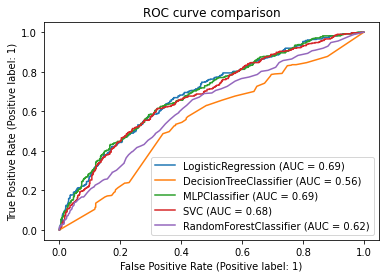

In [373]:
m1_roc=plot_roc_curve(m1, X_test, y_test)
plot_roc_curve(m2, X_test, y_test, ax = m1_roc.ax_)
plot_roc_curve(c_nn, X_test_scaled, y_test, ax = m1_roc.ax_)
plot_roc_curve(c_svm, X_test_scaled, y_test, ax = m1_roc.ax_)
plot_roc_curve(c_rf, X_test, y_test, ax = m1_roc.ax_)
plt.title("ROC curve comparison")
plt.show()

In [491]:
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [501]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/video/master/video_games_sale.csv')

In [503]:
df.describe(include='all')

,Unnamed: 0,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Year_of_ten
count,6825.000000,6825,6825,6825.000000,6825,6825,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825,6825,6825.000000
unique,NaN,4377,17,NaN,12,262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1289,7,NaN
top,NaN,Madden NFL 07,PS2,NaN,Action,Electronic Arts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EA Canada,T,NaN
freq,NaN,8,1140,NaN,1630,944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,149,2377,NaN
mean,3412.000000,NaN,NaN,2007.436777,NaN,NaN,0.394484,0.236089,0.064158,0.082677,0.777590,70.272088,28.931136,7.185626,174.722344,NaN,NaN,2003.012454
std,1970.352126,NaN,NaN,4.211248,NaN,NaN,0.967385,0.687330,0.287570,0.269871,1.963443,13.868572,19.224165,1.439942,587.428538,NaN,NaN,4.846167
min,0.000000,NaN,NaN,1985.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.500000,4.000000,NaN,NaN,1980.000000
25%,1706.000000,NaN,NaN,2004.000000,NaN,NaN,0.060000,0.020000,0.000000,0.010000,0.110000,62.000000,14.000000,6.500000,11.000000,NaN,NaN,2000.000000
50%,3412.000000,NaN,NaN,2007.000000,NaN,NaN,0.150000,0.060000,0.000000,0.020000,0.290000,72.000000,25.000000,7.500000,27.000000,NaN,NaN,2000.000000
75%,5118.000000,NaN,NaN,2011.000000,NaN,NaN,0.390000,0.210000,0.010000,0.070000,0.750000,80.000000,39.000000,8.200000,89.000000,NaN,NaN,2010.000000


In [509]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6825 entries, 0 to 6824
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       6825 non-null   int64  
 1   Name             6825 non-null   object 
 2   Platform         6825 non-null   object 
 3   Year_of_Release  6825 non-null   float64
 4   Genre            6825 non-null   object 
 5   Publisher        6825 non-null   object 
 6   NA_Sales         6825 non-null   float64
 7   EU_Sales         6825 non-null   float64
 8   JP_Sales         6825 non-null   float64
 9   Other_Sales      6825 non-null   float64
 10  Global_Sales     6825 non-null   float64
 11  Critic_Score     6825 non-null   float64
 12  Critic_Count     6825 non-null   float64
 13  User_Score       6825 non-null   float64
 14  User_Count       6825 non-null   float64
 15  Developer        6825 non-null   object 
 16  Rating           6825 non-null   object 
 17  Year_of_ten   

In [515]:
df[['Year_of_Release']] = df[['Year_of_Release']].astype('int')

In [544]:
def Year(x) :
    if 1980 <= x <= 1989 :
        return 1980
    elif 1990 <= x <= 1999 :
        return 1990
    elif 2000 <= x <= 2009 :
        return 2000
    else :
        return 2010

In [545]:
df['Years'] = df['Year_of_Release'].apply(lambda x : Year(x))

In [547]:
df

,Unnamed: 0,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Year_of_ten,Years
0,0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E,2000.0,2000
1,1,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,2000.0,2000
2,2,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E,2000.0,2000
3,3,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E,2000.0,2000
4,4,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E,2000.0,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6820,6820,E.T. The Extra-Terrestrial,GBA,2001,Action,NewKidCo,0.01,0.00,0.00,0.00,0.01,46.0,4.0,2.4,21.0,Fluid Studios,E,2000.0,2000
6821,6821,Mortal Kombat: Deadly Alliance,GBA,2002,Fighting,Midway Games,0.01,0.00,0.00,0.00,0.01,81.0,12.0,8.8,9.0,Criterion Games,M,2000.0,2000
6822,6822,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,Konami Digital Entertainment,0.00,0.01,0.00,0.00,0.01,80.0,20.0,7.6,412.0,Kojima Productions,M,2010.0,2010
6823,6823,Breach,PC,2011,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01,61.0,12.0,5.8,43.0,Atomic Games,T,2010.0,2010


In [ ]:
pd.set_option

In [562]:
df[['Platform']].isin(['PS','PS2','PS3','PS4','PSV'])

,Platform
0,False
1,False
2,False
3,False
4,False
...,...
6820,False
6821,False
6822,False
6823,False


In [563]:
df['Genre']=='Action'

0       False
1       False
2       False
3       False
4       False
        ...  
6820     True
6821    False
6822     True
6823    False
6824    False
Name: Genre, Length: 6825, dtype: bool

In [569]:
len(df[(df['Genre']=='Action')& (df['Platform'].isin(['PS','PS2','PS3','PS4','PSV']))])

616

In [583]:
temp = df.Platform.value_counts()
idx = temp[temp>=400].index

In [591]:
df.groupby('Platform').sum()

,Unnamed: 0,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Year_of_ten,Years
Platform,,,,,,,,,,,,,
3DS,512042,311958,48.67,33.33,33.57,7.65,123.23,10550.0,4959.0,1075.8,15852.0,311550.0,311550
DC,56096,28001,1.54,0.29,2.66,0.06,4.55,1223.0,247.0,119.4,1183.0,27970.0,27970
DS,1683250,931420,173.40,95.30,83.66,29.86,382.33,30867.0,10897.0,3269.9,14005.0,928450.0,928450
GBA,859872,474731,79.39,32.60,16.13,3.58,131.75,16685.0,3778.0,1823.0,5725.0,474000.0,474000
GC,1335844,697154,107.93,30.93,16.12,4.27,159.42,24779.0,7607.0,2650.6,12959.0,696000.0,696000
PC,3305474,1307897,63.76,104.82,0.17,17.80,187.12,49646.0,18695.0,4596.3,455091.0,1305030.0,1305030
PS,390114,299905,91.76,64.58,38.85,11.46,206.55,11078.0,1652.0,1179.0,11587.0,299350.0,299350
PS2,3467898,2284262,472.65,255.14,75.81,142.41,945.97,79221.0,28216.0,8737.4,52500.0,2280010.0,2280010
PS3,1989860,1545760,341.62,273.50,54.52,114.81,784.30,54563.0,26855.0,5215.9,174940.0,1542530.0,1542530


In [598]:
df[df['Platform'].isin(idx)].groupby('Platform').mean()['User_Score'].sort_values(ascending=False).to_frame()

,User_Score
Platform,
PS2,7.664386
XB,7.540708
PC,7.060369
DS,7.047198
Wii,6.903758
PS3,6.782705
X360,6.780769


In [620]:
a = df[df.Name.str.contains('Mario')]['Developer'].value_counts()
a[a==3].index

Index(['Nintendo, Nintendo Software Technology', 'Nintendo, Nd Cube'], dtype='object')

In [635]:
help(scipy.skew)

AttributeError: module 'scipy' has no attribute 'skew'

In [639]:
from scipy.stats import skew, kurtosis

In [647]:
df[df.Platform=='PS2'].User_Score.kurtosis()

2.4920035946875965

In [667]:
df[df['Platform'].isin(['PS2'])]['User_Score'].sum()

8737.4

In [656]:
a = df[df['Platform'].isin(['PS2'])]['User_Score']

In [666]:
np.sum(a)

8737.4

In [681]:
from sklearn.preprocessing import StandardScaler

In [706]:
scale = StandardScaler()
a = scale.fit_transform(df[['User_Score']]).var()
print('{0:.2f} '.format(a))

1.00 


In [707]:
df

,Unnamed: 0,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Year_of_ten,Years
0,0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E,2000.0,2000
1,1,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,2000.0,2000
2,2,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E,2000.0,2000
3,3,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E,2000.0,2000
4,4,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E,2000.0,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6820,6820,E.T. The Extra-Terrestrial,GBA,2001,Action,NewKidCo,0.01,0.00,0.00,0.00,0.01,46.0,4.0,2.4,21.0,Fluid Studios,E,2000.0,2000
6821,6821,Mortal Kombat: Deadly Alliance,GBA,2002,Fighting,Midway Games,0.01,0.00,0.00,0.00,0.01,81.0,12.0,8.8,9.0,Criterion Games,M,2000.0,2000
6822,6822,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,Konami Digital Entertainment,0.00,0.01,0.00,0.00,0.01,80.0,20.0,7.6,412.0,Kojima Productions,M,2010.0,2010
6823,6823,Breach,PC,2011,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01,61.0,12.0,5.8,43.0,Atomic Games,T,2010.0,2010


In [713]:
len(df[(df['NA_Sales']+df['EU_Sales']+df['JP_Sales']+df['Other_Sales'])!=df['Global_Sales']])

3636

In [718]:
# User_Count컬럼의 값이 120 이상인 게임들 중에서 User_Score의 값이 9.0이상인 게임의 수를 구하여라
df[(df['User_Count']>=120)&(df['User_Score']>=9.0)]

,Unnamed: 0,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Year_of_ten,Years
11,11,Grand Theft Auto: San Andreas,PS2,2004,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81,95.0,80.0,9.0,1588.0,Rockstar North,M,2000.0,2000
42,42,Final Fantasy VII,PS,1997,Role-Playing,Sony Computer Entertainment,3.01,2.47,3.28,0.96,9.72,92.0,20.0,9.2,1282.0,SquareSoft,T,1990.0,1990
44,44,Gran Turismo 2,PS,1999,Racing,Sony Computer Entertainment,3.88,3.42,1.69,0.50,9.49,93.0,23.0,9.0,135.0,Polyphony Digital,T,1990.0,1990
63,63,Super Mario Galaxy 2,Wii,2010,Platform,Nintendo,3.56,2.35,0.98,0.62,7.51,97.0,87.0,9.1,1854.0,Nintendo EAD Tokyo,E,2010.0,2010
70,70,Tekken 3,PS,1998,Fighting,Sony Computer Entertainment,3.27,2.22,1.40,0.29,7.16,96.0,15.0,9.1,367.0,Namco,T,1990.0,1990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6480,6480,Max Payne 2: The Fall of Max Payne,PC,2003,Shooter,Take-Two Interactive,0.00,0.02,0.00,0.00,0.03,86.0,46.0,9.0,802.0,Remedy Entertainment,M,2000.0,2000
6578,6578,Left 4 Dead,PC,2008,Shooter,Electronic Arts,0.00,0.02,0.00,0.00,0.02,89.0,58.0,9.2,3717.0,Valve Software,M,2000.0,2000
6591,6591,Max Payne,PC,2001,Shooter,Take-Two Interactive,0.00,0.02,0.00,0.00,0.02,89.0,32.0,9.1,1016.0,Remedy Entertainment,M,2000.0,2000
6594,6594,Homeworld,PC,1998,Strategy,Vivendi Games,0.00,0.02,0.00,0.00,0.02,93.0,20.0,9.0,326.0,Relic,E,1990.0,1990


In [724]:
# Global_Sales컬럼의 값들을 robust스케일을 진행하고 40이상인 데이터 수를 구하여라
from sklearn.preprocessing import RobustScaler
scale = RobustScaler()
temp = scale.fit_transform(df[['Global_Sales']])
len(temp[temp>=40])

6

In [728]:
df[['Global_Sales']]

,Global_Sales
0,82.53
1,35.52
2,32.77
3,29.80
4,28.92
...,...
6820,0.01
6821,0.01
6822,0.01
6823,0.01


In [732]:
df.Global_Sales.values.reshape(-1,1)

array([[8.253e+01],
       [3.552e+01],
       [3.277e+01],
       ...,
       [1.000e-02],
       [1.000e-02],
       [1.000e-02]])

In [761]:
mean = data.qsec.mean()
std = data.qsec.std()
data.qsec_sc = (data.qsec-mean)/std

In [770]:
round(min(data.qsec_sc),2),max(data.qsec_sc)

(-1.87, 2.826754592962484)

In [782]:
min(data['wt'])

1.5130000000000001

In [796]:
Q1=data['wt'].quantile(.25)
Q3=data['wt'].quantile(.75)
IQR = Q3-Q1
min = Q1-1.5*IQR
max = Q3+ 1.5*IQR
data.wt[data['wt']>max].values

array([5.25 , 5.424, 5.345])

In [802]:
help(np.corr)

AttributeError: module 'numpy' has no attribute 'corr'

In [814]:
data.corr()['mpg'][1:].sort_values(ascending=False)

drat       0.681172
vs         0.664039
am         0.599832
gear       0.480285
qsec       0.418684
qsec_sc    0.418684
carb      -0.550925
hp        -0.776168
disp      -0.847551
cyl       -0.852162
wt        -0.867659
Name: mpg, dtype: float64

In [819]:
data

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,qsec_sc
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,-0.777165
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,-0.463781
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,0.426007
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,0.890487
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,-0.463781
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1,1.326987
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4,-1.124126
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2,1.203871
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2,2.826755
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4,0.252526


In [835]:
from sklearn.decomposition import PCA

In [879]:
pca = PCA(n_components=0.92)

In [858]:
0.55607137+0.28642254+0.07193939+0.0235012

0.9379345

In [881]:
pca.fit_transform(temp)

array([[ 3.29190979e-01,  1.20570077e+00, -2.66236418e-01,
         1.93307079e-02],
       [ 2.96663737e-01,  9.88554247e-01, -9.20838574e-03,
         9.07881437e-02],
       [ 1.82192491e+00,  3.31689580e-02, -2.88075875e-01,
        -6.36920164e-04],
       [ 4.99634405e-01, -1.56689293e+00, -2.49832046e-01,
        -2.94499059e-01],
       [-1.01448486e+00, -6.07965284e-01, -8.59252147e-01,
         2.14345552e-02],
       [ 4.89533699e-01, -1.93897194e+00,  6.86093637e-03,
        -5.81567934e-01],
       [-1.93708734e+00,  2.34833680e-01, -5.38616200e-01,
        -1.64438036e-01],
       [ 1.37463764e+00, -8.35161358e-01,  7.07387133e-01,
        -9.57596396e-02],
       [ 1.76120687e+00, -1.40392729e+00,  1.56434787e+00,
        -1.21475750e-02],
       [ 2.50994100e-01,  1.18778284e-01,  8.86137645e-01,
        -3.96685209e-02],
       [ 3.46828810e-01, -3.40745758e-02,  1.05197435e+00,
        -5.77227091e-02],
       [-1.32736602e+00, -6.59829176e-01, -2.10635660e-01,
      

In [884]:
pca.n_components_, pca.explained_variance_ratio_

(4, array([0.55607137, 0.28642254, 0.07193939, 0.0235012 ]))

In [849]:
a = scale.fit_transform(data.iloc[:,2:12])

In [872]:
data['brand'] = data.iloc[:,0].str.split(' ').str.get(0)

In [ ]:
pca

In [873]:
data

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,qsec_sc,brand
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,-0.777165,Mazda
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,-0.463781,Mazda
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,0.426007,Datsun
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,0.890487,Hornet
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,-0.463781,Hornet
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1,1.326987,Valiant
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4,-1.124126,Duster
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2,1.203871,Merc
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2,2.826755,Merc
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4,0.252526,Merc


In [892]:
from urllib.request import urlopen
from bs4 import BeautifulSoup as bs

In [926]:
url = 'https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20210503'

In [927]:
html = urlopen(url)
soup = bs(html)

C:\Users\choi yeseul\anaconda3\lib\site-packages\bs4\__init__.py:177: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 194 of the file C:\Users\choi yeseul\anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  warnings.warn(self.NO_PARSER_SPECIFIED_WARNING % dict(


In [928]:
soup

<!DOCTYPE html>
<html lang="ko">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="me2:image"/>
<meta content="네이버영화 " property="me2:post_tag"/>
<meta content="네이버영화" property="me2:category1"/>
<meta content="" property="me2:category2"/>
<meta content="랭킹 : 네이버 영화" property="og:title"/>
<meta content="영화, 영화인, 예매, 박스오피스 랭킹 정보 제공" property="og:description"/>
<meta content="article" property="og:type"/>
<meta content="https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&amp;date=20210503" property="og:url"/>
<meta content="http://static.naver.net/m/movie/icons/OG_270_270.png" property="og:image"/><!-- http://static.naver.net/m/movie/im/navermovie.jpg -->
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="og:article:thumbnailUrl"/>
<meta content="네이버 영화" property="og:article:author"/>


In [930]:
ranking = soup.find(class_ = 'list_ranking')

In [909]:
ranking = soup.find(class_='list_ranking')

In [953]:
ranking.find_all('div','tit5')[0].a.get_text()

'레옹'

In [955]:
ranking.find_all('td','point')[0].get_text()

'9.37'

In [956]:
ranking.find_all('div','tit5')[0].a['href']

'/movie/bi/mi/basic.nhn?code=17170'

In [958]:
name = []
rank = []
link = []
for i in range(0,len(ranking.find_all('div','tit5'))) :
    names = ranking.find_all('div','tit5')[i].a.get_text()
    ranks = ranking.find_all('td','point')[i].get_text()
    links = ranking.find_all('div','tit5')[i].a['href']
    name.append(names)
    rank.append(ranks)
    link.append(links)

In [964]:
craw = pd.DataFrame({'name':name,'rank':rank,'link':link})

In [967]:
craw

,name,rank,link
0,레옹,9.37,/movie/bi/mi/basic.nhn?code=17170
1,다시 태어나도 우리,9.35,/movie/bi/mi/basic.nhn?code=154573
2,피아니스트,9.33,/movie/bi/mi/basic.nhn?code=35187
3,"미안해요, 리키",9.32,/movie/bi/mi/basic.nhn?code=185275
4,부활: 그 증거,9.31,/movie/bi/mi/basic.nhn?code=194334
5,자산어보,9.31,/movie/bi/mi/basic.nhn?code=189075
6,소울,9.30,/movie/bi/mi/basic.nhn?code=184517
7,극장판 귀멸의 칼날: 무한열차편,9.30,/movie/bi/mi/basic.nhn?code=196051
8,플립,9.27,/movie/bi/mi/basic.nhn?code=76309
9,우리들,9.26,/movie/bi/mi/basic.nhn?code=146504


In [968]:
craw['temp'] = 'https://movie.naver.com'

In [972]:
craw['link'] = craw['temp'].str.cat(craw['link'])

In [981]:
craw.index

RangeIndex(start=0, stop=50, step=1)

In [992]:
from urllib.parse import quote
from urllib.request import Request
from bs4 import BeautifulSoup

In [993]:
endpoint = 'http://apis.data.go.kr/B552657/ErmctInsttInfoInqireService'
servicekey='h2mLc7vL1zItTKcrj91QtEN1LzL9XmC2%2Fr5OfMz5Z2qYxdT6y6zGQDoGbayFwP2wUzDVzDlPvfvkH%2BKt6hcPdw%3D%3D'

In [998]:
Q0 = quote('서울특별시')
Q1 = quote('중랑구')
QT = "1"
pageNo = '1'
numOfRow ='100'

In [1007]:
endpoint = 'http://apis.data.go.kr/B552657/ErmctInsttInfoInqireService/getParmacyListInfoInqire?'
http://apis.data.go.kr/B552657/ErmctInsttInfoInqireService/getParmacyListInfoInqire?

In [1008]:
param = 'servicekey=' + servicekey + '&'+ 'Q0=' + Q0 + '&' + 'Q1=' + Q1 + '&' + 'QT=' + QT + 'pageNo=' + pageNo +'&' + 'numofRows=' + numOfRow

In [1015]:
import requests

In [1036]:
url = urlopen(endpoint + param)
a = BeautifulSoup(url)

C:\Users\choi yeseul\anaconda3\lib\site-packages\bs4\__init__.py:177: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 194 of the file C:\Users\choi yeseul\anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  warnings.warn(self.NO_PARSER_SPECIFIED_WARNING % dict(


In [1020]:
a

<?xml version="1.0" encoding="UTF-8" standalone="yes"?><html><body><response><header><resultcode>00</resultcode><resultmsg>NORMAL SERVICE.</resultmsg></header><items><item><dutyaddr>서울특별시 중랑구 면목로39길 8, 한성빌딩 (면목동)</dutyaddr><dutyname>365밝은약국</dutyname><dutytel1>02-435-0365</dutytel1><dutytime1c>2100</dutytime1c><dutytime1s>0840</dutytime1s><dutytime2c>2100</dutytime2c><dutytime2s>0840</dutytime2s><dutytime3c>2100</dutytime3c><dutytime3s>0840</dutytime3s><dutytime4c>2100</dutytime4c><dutytime4s>0840</dutytime4s><dutytime5c>2100</dutytime5c><dutytime5s>0840</dutytime5s><dutytime6c>1300</dutytime6c><dutytime6s>0840</dutytime6s><hpid>C1102121</hpid><postcdn1>022</postcdn1><postcdn2>38 </postcdn2><rnum>1</rnum><wgs84lat>37.579762867300005</wgs84lat><wgs84lon>127.08717180940002</wgs84lon></item><item><dutyaddr>서울특별시 중랑구 망우로 353 C동 309호 (상봉동, 상봉 프레미어스 엠코)</dutyaddr><dutymapimg>현대엠코 이노시티</dutymapimg><dutyname>3층엠코약국</dutyname><dutytel1>02-434-7707</dutytel1><dutytime1c>2100</dutytime1c><dutytim

In [1046]:
a.findAll('dutyaddr')[0].get_text()

'서울특별시 중랑구 면목로39길 8, 한성빌딩 (면목동)'

In [1033]:
a.find('title')